## Hierachical Models Assignment

In [1]:
# import pandas
import pandas as pd

# import Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# import scipy.cluster.hierarchy
import scipy.cluster.hierarchy as sch

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')

## Objective: 

- Fit Hierarchical clustering, 
- find optimal number of clusters via dendrogram 
- and plot clusters. 

Again, to simplify plotting in 2-D, we can create clustering model based on the last two columns of the dataset only.

In [3]:
df.head(2)
df_2d = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df_2d.head(2)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81


* define function plot_dendogram

In [4]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

* Plot dendrogram

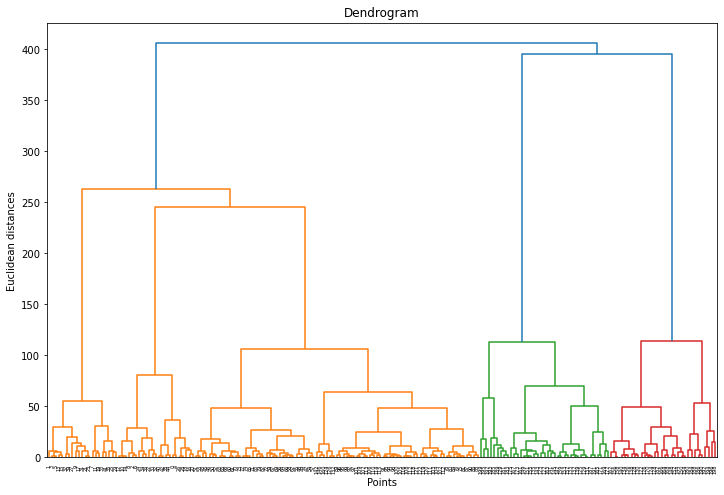

In [6]:
# Plot dendrogram
plot_dendrogram(df_2d)

* Fit Hierarchical clustering with optimal number of clusters

In [19]:
# The next step is to create an object from the AgglomerativeClustering class
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward', #The linkage criteria determine the metric used for the merge strategy
                             n_clusters = 5)

* define function plot_clusters

In [20]:
y_hc = ac.fit_predict(df_2d)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

* Plot HC clusters

In [16]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

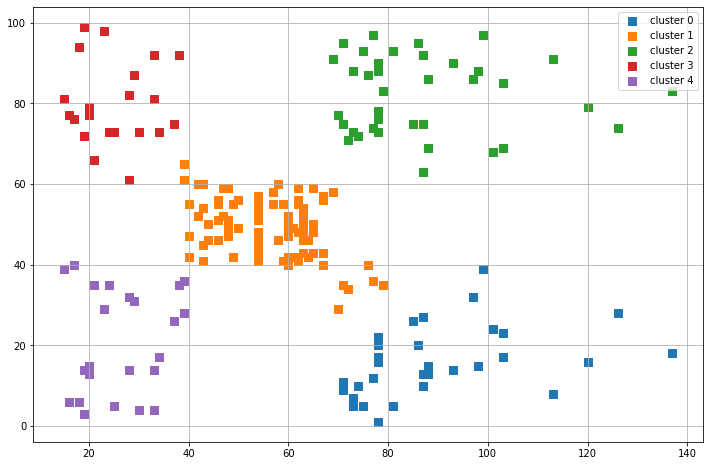

In [21]:
X = df_2d.to_numpy()
plot_clusters(X,y_hc)

In [22]:
# ####################################### Try ways from lecture - alternate ways of linkage

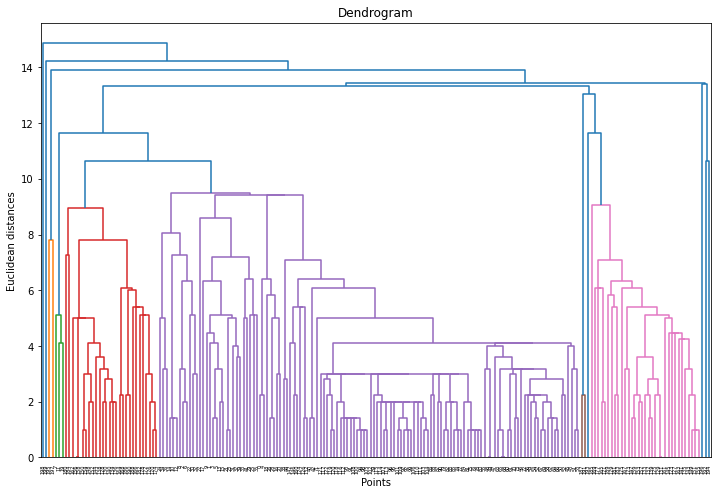

In [26]:
# Single
plot_dendrogram(X,method ='single')

In [43]:
single = AgglomerativeClustering(n_clusters=12, linkage="single")
single_pred = single.fit_predict(X)

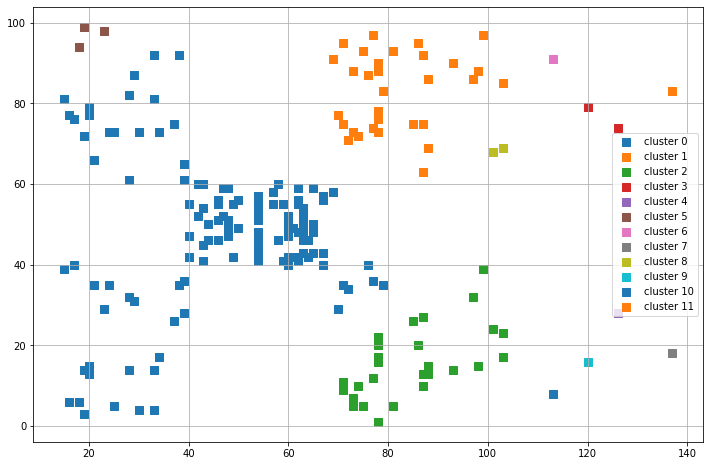

In [44]:
plot_clusters(X,single_pred)

In [24]:
# Complete

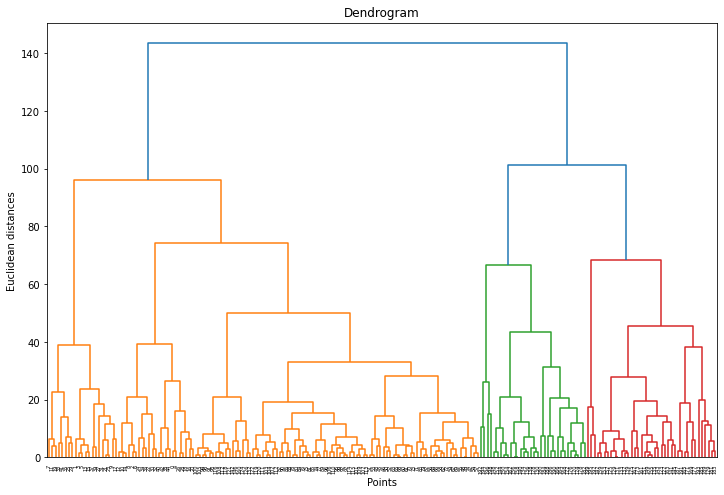

In [29]:
plot_dendrogram(X,method ='complete');

In [34]:
complete = AgglomerativeClustering(n_clusters=7, linkage="complete")
complete_pred = complete.fit_predict(X)

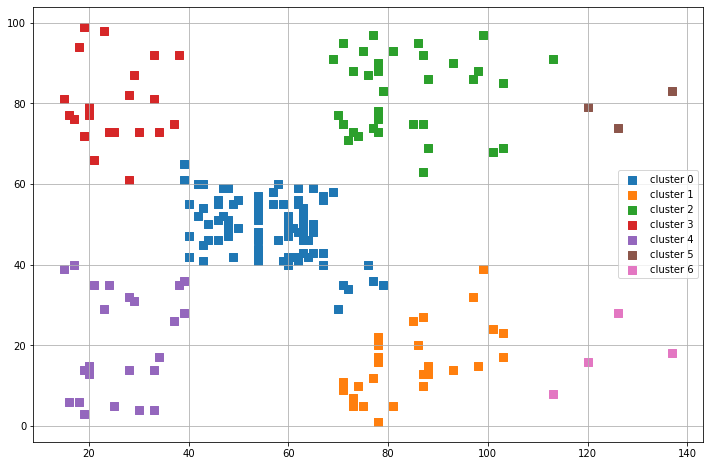

In [36]:
plot_clusters(X,complete_pred)

In [25]:
# Average

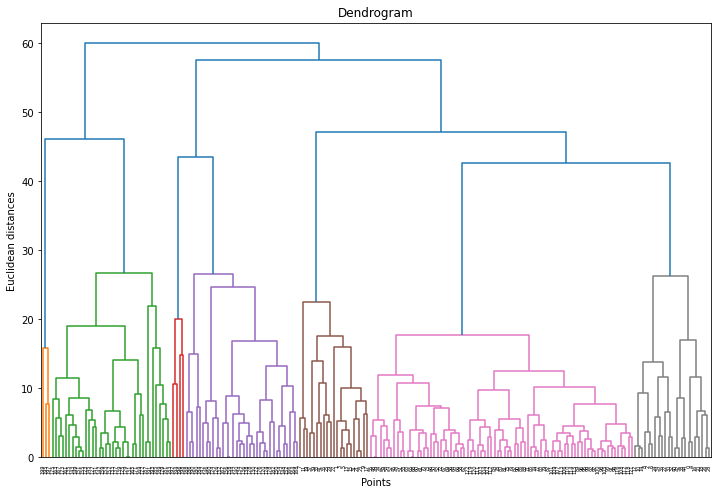

In [30]:
plot_dendrogram(X,method ='average');

In [41]:
average = AgglomerativeClustering(n_clusters=7, linkage="average")
avg_pred = average.fit_predict(X)

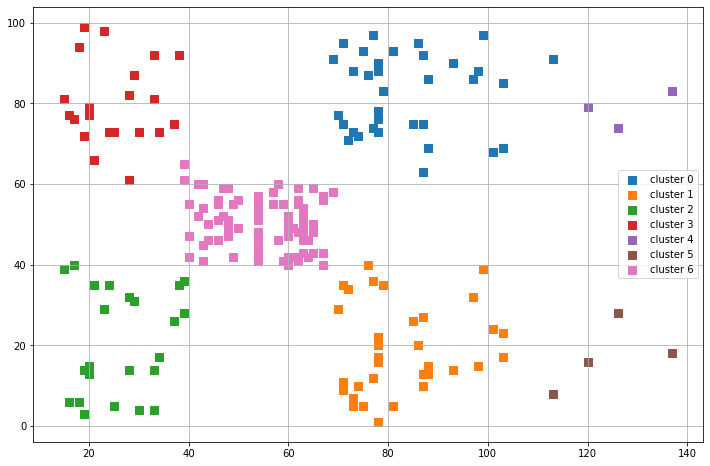

In [42]:
plot_clusters(X,avg_pred)